<a href="https://colab.research.google.com/github/Ratri903/Ml_Final/blob/main/Dairy_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Load the CSV from your permanent folder
file_path = '/content/drive/MyDrive/MLFinalLab/nutrients_csvfile.csv'
df = pd.read_csv(file_path)

# Display column names and the first 5 rows
print("Columns in the dataset:")
print(df.columns)

print("\nFirst 5 rows:")
print(df.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Index(['Food', 'Measure', 'Grams', 'Calories', 'Protein', 'Fat', 'Sat.Fat',
       'Fiber', 'Carbs', 'Category'],
      dtype='object')


,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,t,t,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,"1,419","1,373",89,42,23,1.4,119,Dairy products


# Machine Learning Final Lab


# 1. Decision Tree


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Original shape: (335, 10)

Missing values per column after coercion:
Food          0
Measure       0
Grams         0
Calories      5
Protein      39
Fat         116
Sat.Fat      17
Fiber        27
Carbs        13
Category      0
dtype: int64

Shape after dropping NaNs: (168, 10)

Train shape: (100, 7), Validation shape: (34, 7), Test shape: (34, 7)

Accuracy:              0.85294
Precision (PPV):       0.33333
Recall (Sensitivity):  0.25000
F1 Score:              0.28571
ROC AUC:               0.59167
Specificity (TNR):     0.93333
False Positive Rate:   0.06667
False Negative Rate:   0.75000
Balanced Accuracy:     0.59167
Matthews Corr Coef:    0.20825


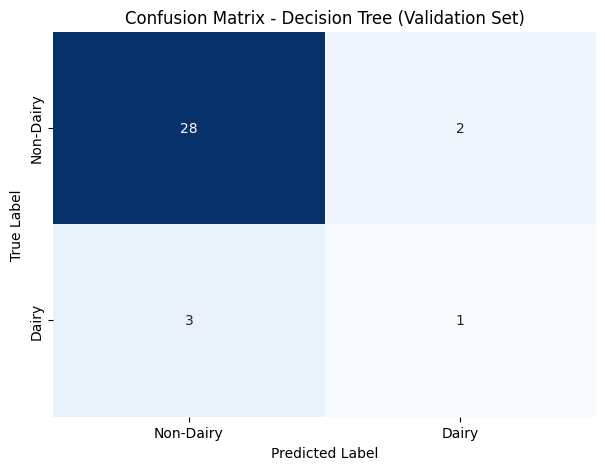

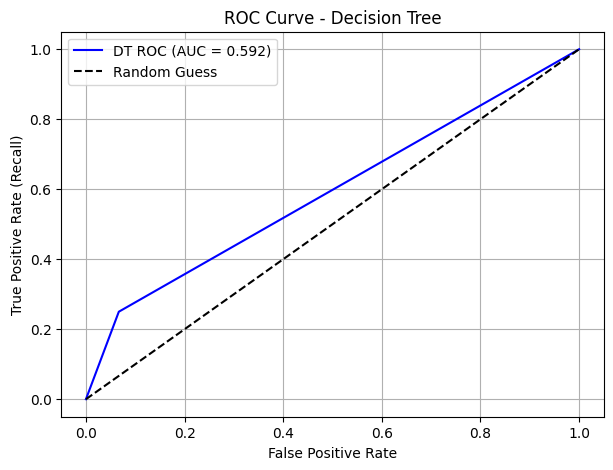

In [ ]:
# --- Import libraries ---
import pandas as pd
import numpy as np
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, balanced_accuracy_score, matthews_corrcoef
)
import seaborn as sns
import matplotlib.pyplot as plt

# --- Mount Google Drive ---
drive.mount('/content/drive')

# --- Load your dataset ---
file_path = '/content/drive/MyDrive/MLFinalLab/nutrients_csvfile.csv'
df = pd.read_csv(file_path)

print("Original shape:", df.shape)

# --- Data cleaning ---
# Replace invalid entries like 't' with NaN, then drop them
cols_to_clean = ['Calories', 'Protein', 'Fat', 'Sat.Fat', 'Fiber', 'Carbs']
for col in cols_to_clean:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print("\nMissing values per column after coercion:")
print(df.isnull().sum())

df.dropna(inplace=True)
print("\nShape after dropping NaNs:", df.shape)

# --- Create binary target ---
# Dairy = 1, Non-Dairy = 0
df['Label'] = (df['Category'] == 'Dairy products').astype(int)

# --- Prepare features and target ---
drop_cols = ['Food', 'Measure', 'Category', 'Label']
X = df.drop(columns=drop_cols)
y = df['Label']

# Encode any categorical features in X (if any)
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = LabelEncoder().fit_transform(X[col])

# --- Train-validation-test split ---
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)  # 0.25 * 0.8 = 0.2

print(f"\nTrain shape: {X_train.shape}, Validation shape: {X_val.shape}, Test shape: {X_test.shape}")

# --- Train Decision Tree ---
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# --- Predict on validation set ---
y_pred_val = dt_model.predict(X_val)
y_prob_val = dt_model.predict_proba(X_val)[:, 1]  # Probabilities for positive class

# --- Evaluation metrics ---
cm = confusion_matrix(y_val, y_pred_val)
TN, FP, FN, TP = cm.ravel()

accuracy = accuracy_score(y_val, y_pred_val)
precision = precision_score(y_val, y_pred_val)
recall = recall_score(y_val, y_pred_val)
f1 = f1_score(y_val, y_pred_val)
roc_auc = roc_auc_score(y_val, y_prob_val)
specificity = TN / (TN + FP)
fpr = FP / (FP + TN)
fnr = FN / (FN + TP)
balanced_acc = balanced_accuracy_score(y_val, y_pred_val)
mcc = matthews_corrcoef(y_val, y_pred_val)

print(f"\nAccuracy:              {accuracy:.5f}")
print(f"Precision (PPV):       {precision:.5f}")
print(f"Recall (Sensitivity):  {recall:.5f}")
print(f"F1 Score:              {f1:.5f}")
print(f"ROC AUC:               {roc_auc:.5f}")
print(f"Specificity (TNR):     {specificity:.5f}")
print(f"False Positive Rate:   {fpr:.5f}")
print(f"False Negative Rate:   {fnr:.5f}")
print(f"Balanced Accuracy:     {balanced_acc:.5f}")
print(f"Matthews Corr Coef:    {mcc:.5f}")

# --- Plot Confusion Matrix ---
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Non-Dairy', 'Dairy'], yticklabels=['Non-Dairy', 'Dairy'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Decision Tree (Validation Set)')
plt.show()

# --- Plot ROC Curve ---
from sklearn.metrics import roc_curve

fpr_curve, tpr_curve, _ = roc_curve(y_val, y_prob_val)
plt.figure(figsize=(7,5))
plt.plot(fpr_curve, tpr_curve, label=f'DT ROC (AUC = {roc_auc:.3f})', color='blue')
plt.plot([0,1], [0,1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve - Decision Tree')
plt.legend()
plt.grid(True)
plt.show()


#2. K-Nearest Neighbor (KNN)

In [ ]:
# --- Import libraries ---
import pandas as pd
import numpy as np
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, precision_score,
    recall_score, f1_score, roc_auc_score, balanced_accuracy_score, matthews_corrcoef
)

# --- Mount Google Drive ---
drive.mount('/content/drive')

# --- Load your dataset ---
file_path = '/content/drive/MyDrive/MLFinalLab/nutrients_csvfile.csv'
df = pd.read_csv(file_path)

print("Original shape:", df.shape)

# --- Data cleaning ---
cols_to_clean = ['Calories', 'Protein', 'Fat', 'Sat.Fat', 'Fiber', 'Carbs']
for col in cols_to_clean:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print("\nMissing values per column after coercion:")
print(df.isnull().sum())

df.dropna(inplace=True)
print("\nShape after dropping NaNs:", df.shape)

# --- Create binary target ---
# Dairy = 1, Non-Dairy = 0
df['Label'] = (df['Category'] == 'Dairy products').astype(int)

# --- Prepare features and target ---
drop_cols = ['Food', 'Measure', 'Category', 'Label']
X = df.drop(columns=drop_cols)
y = df['Label']

# Encode any categorical features in X (if any)
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = LabelEncoder().fit_transform(X[col])

# --- Split data into train and test sets ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- Feature Scaling (Standardization) ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Train KNN Classifier ---
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# --- Make Predictions ---
y_pred = knn.predict(X_test_scaled)
y_prob = knn.predict_proba(X_test_scaled)[:, 1]

# --- Evaluate Model Performance ---
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

TN, FP, FN, TP = cm.ravel()
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
balanced_acc = balanced_accuracy_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

print(f"Precision: {precision:.5f}")
print(f"Recall: {recall:.5f}")
print(f"F1 Score: {f1:.5f}")
print(f"ROC AUC: {roc_auc:.5f}")
print(f"Balanced Accuracy: {balanced_acc:.5f}")
print(f"Matthews Corr Coef: {mcc:.5f}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Original shape: (335, 10)

Missing values per column after coercion:
Food          0
Measure       0
Grams         0
Calories      5
Protein      39
Fat         116
Sat.Fat      17
Fiber        27
Carbs        13
Category      0
dtype: int64

Shape after dropping NaNs: (168, 10)
Accuracy: 0.9117647058823529

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95        30
           1       0.67      0.50      0.57         4

    accuracy                           0.91        34
   macro avg       0.80      0.73      0.76        34
weighted avg       0.90      0.91      0.91        34

Confusion Matrix:
 [[29  1]
 [ 2  2]]
True Positives (TP): 2
True Negatives (TN): 29
False Positives (FP): 1
False Negatives (FN): 2
Precision: 0.66667
Recall: 0.50000
F1 Score: 0.57143
ROC AUC: 0.72083
Balance

#3. Random Forest (RF)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Original shape: (335, 10)

Missing values per column after coercion:
Food          0
Measure       0
Grams         0
Calories      5
Protein      39
Fat         116
Sat.Fat      17
Fiber        27
Carbs        13
Category      0
dtype: int64

Shape after dropping NaNs: (168, 10)

Accuracy:              0.94118
Precision (PPV):       1.00000
Recall (Sensitivity):  0.50000
F1 Score:              0.66667
ROC AUC:               0.99167
Specificity (TNR):     1.00000
False Positive Rate:   0.00000
False Negative Rate:   0.50000
Balanced Accuracy:     0.75000
Matthews Corr Coef:    0.68465


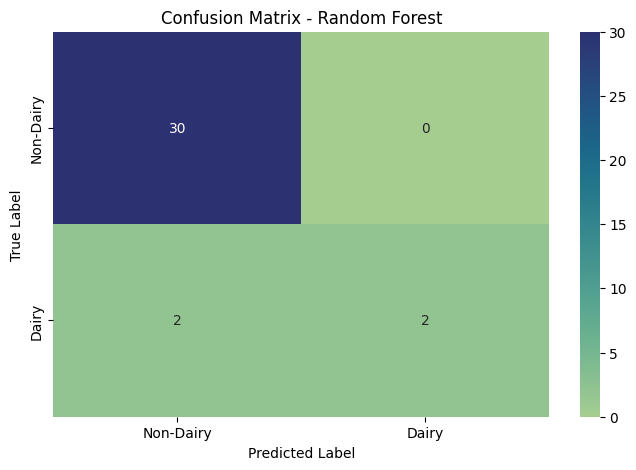

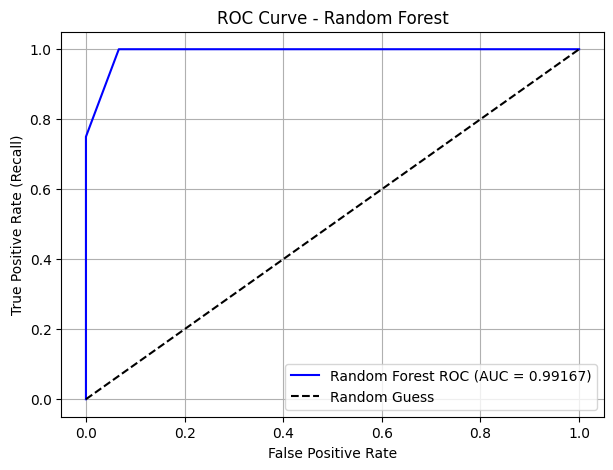

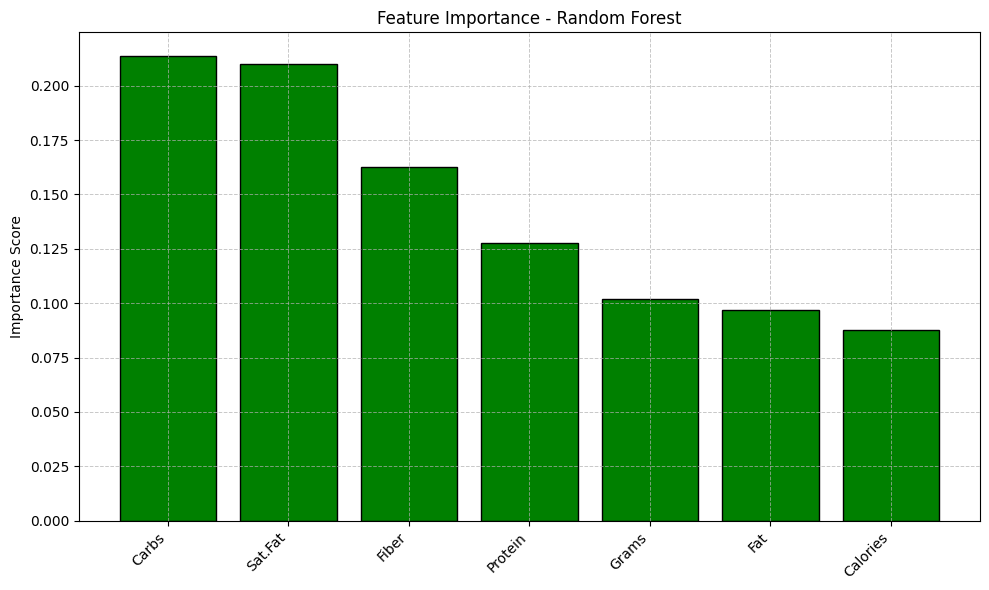

In [ ]:
# --- Import libraries ---
import pandas as pd
import numpy as np
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, balanced_accuracy_score,
    matthews_corrcoef, roc_curve
)
import seaborn as sns
import matplotlib.pyplot as plt

# --- Mount Google Drive ---
drive.mount('/content/drive')

# --- Load dataset ---
file_path = '/content/drive/MyDrive/MLFinalLab/nutrients_csvfile.csv'
df = pd.read_csv(file_path)

print("Original shape:", df.shape)

# --- Data cleaning ---
cols_to_clean = ['Calories', 'Protein', 'Fat', 'Sat.Fat', 'Fiber', 'Carbs']
for col in cols_to_clean:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print("\nMissing values per column after coercion:")
print(df.isnull().sum())

df.dropna(inplace=True)
print("\nShape after dropping NaNs:", df.shape)

# --- Create binary target: Dairy=1, Non-Dairy=0 ---
df['Label'] = (df['Category'] == 'Dairy products').astype(int)

# --- Prepare features and target ---
drop_cols = ['Food', 'Measure', 'Category', 'Label']
X = df.drop(columns=drop_cols)
y = df['Label']

# Encode categorical features if any (usually none here but just in case)
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = LabelEncoder().fit_transform(X[col])

# --- Train-Test split (80-20 stratified) ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- Train Random Forest with class_weight balanced ---
rf_model = RandomForestClassifier(
    n_estimators=10,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# --- Evaluation metrics ---
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
balanced_acc = balanced_accuracy_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)

print(f"\nAccuracy:              {accuracy:.5f}")
print(f"Precision (PPV):       {precision:.5f}")
print(f"Recall (Sensitivity):  {recall:.5f}")
print(f"F1 Score:              {f1:.5f}")
print(f"ROC AUC:               {roc_auc:.5f}")
print(f"Specificity (TNR):     {specificity:.5f}")
print(f"False Positive Rate:   {fpr:.5f}")
print(f"False Negative Rate:   {fnr:.5f}")
print(f"Balanced Accuracy:     {balanced_acc:.5f}")
print(f"Matthews Corr Coef:    {mcc:.5f}")

# --- Confusion Matrix plot ---
plt.figure(figsize=(8, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='crest', cbar=True,
            xticklabels=['Non-Dairy', 'Dairy'], yticklabels=['Non-Dairy', 'Dairy'])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# --- ROC Curve plot ---
y_prob = rf_model.predict_proba(X_test)[:, 1]
fpr_curve, tpr_curve, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(7, 5))
plt.plot(fpr_curve, tpr_curve, label=f'Random Forest ROC (AUC = {roc_auc:.5f})', color='blue')
plt.plot([0,1], [0,1], 'k--', label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.grid(True)
plt.show()

# --- Feature Importance plot ---
importances = rf_model.feature_importances_
features = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance - Random Forest")
plt.bar(range(len(features)), importances[indices], color='green', edgecolor='black')
plt.xticks(range(len(features)), features[indices], rotation=45, ha='right')
plt.ylabel("Importance Score")
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.show()


#4. Confusion Metrics

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score, roc_auc_score, balanced_accuracy_score,
    matthews_corrcoef, roc_curve
)

def evaluate_classification(y_true, y_pred, y_prob=None, title="Confusion Matrix"):
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    TN, FP, FN, TP = cm.ravel()

    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    balanced_acc = balanced_accuracy_score(y_true, y_pred)
    mcc = matthews_corrcoef(y_true, y_pred)

    specificity = TN / (TN + FP) if (TN + FP) != 0 else 0
    fpr = FP / (FP + TN) if (FP + TN) != 0 else 0
    fnr = FN / (FN + TP) if (FN + TP) != 0 else 0

    roc_auc = roc_auc_score(y_true, y_prob) if y_prob is not None else None

    # Print metrics
    print(f"Accuracy:              {accuracy:.4f}")
    print(f"Precision (PPV):       {precision:.4f}")
    print(f"Recall (Sensitivity):  {recall:.4f}")
    print(f"F1 Score:              {f1:.4f}")
    if roc_auc is not None:
        print(f"ROC AUC:               {roc_auc:.4f}")
    print(f"Specificity (TNR):     {specificity:.4f}")
    print(f"False Positive Rate:   {fpr:.4f}")
    print(f"False Negative Rate:   {fnr:.4f}")
    print(f"Balanced Accuracy:     {balanced_acc:.4f}")
    print(f"Matthews Corr Coef:    {mcc:.4f}")
    print()

    # Plot confusion matrix heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=["Predicted 0", "Predicted 1"],
                yticklabels=["Actual 0", "Actual 1"])
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

    # Plot ROC curve
    if y_prob is not None:
        fpr_curve, tpr_curve, _ = roc_curve(y_true, y_prob)
        plt.figure(figsize=(6, 4))
        plt.plot(fpr_curve, tpr_curve, label=f'ROC Curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()


Accuracy:              0.9118
Precision (PPV):       0.6667
Recall (Sensitivity):  0.5000
F1 Score:              0.5714
ROC AUC:               0.4500
Specificity (TNR):     0.9667
False Positive Rate:   0.0333
False Negative Rate:   0.5000
Balanced Accuracy:     0.7333
Matthews Corr Coef:    0.5301



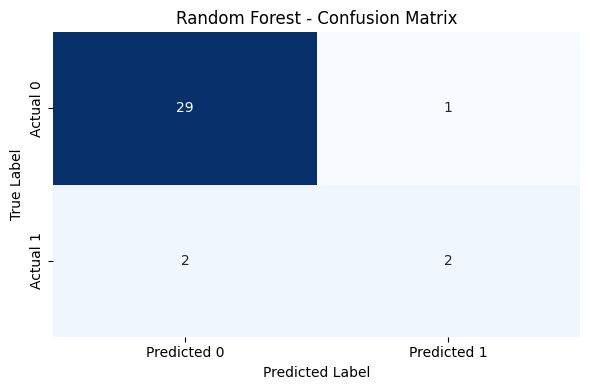

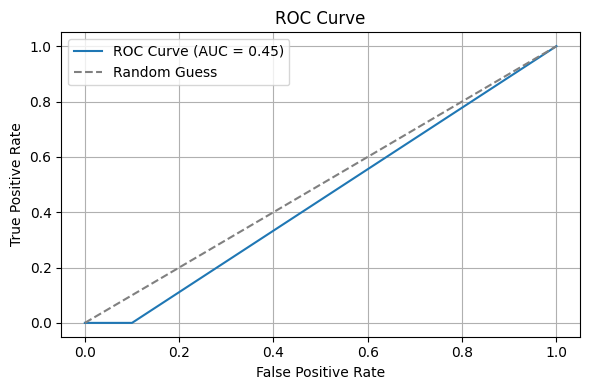

In [ ]:
evaluate_classification(y_test, y_pred, y_prob_val, title="Random Forest - Confusion Matrix")


#5 Naive bayes
